In [1]:
!pip install keras tensorflow -U


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

In [23]:
df = pd.read_csv('diabetes.csv')

In [24]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [25]:
df.shape

(768, 9)

In [26]:
x = df.iloc[:, :8]  # All rows, first 8 columns
y = df.iloc[:, 8] 

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [28]:
print(f"x train shape{X_train.shape}")
print(f"y train shape{y_train.shape}")
print(f"x test shape{X_test.shape}")
print(f"y test shape{y_test.shape}")
print(f"x val shape{X_val.shape}")
print(f"y val shape{y_val.shape}")

x train shape(614, 8)
y train shape(614,)
x test shape(77, 8)
y test shape(77,)
x val shape(77, 8)
y val shape(77,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [30]:
from collections import Counter
Counter(y)

Counter({0: 500, 1: 268})

In [31]:
import seaborn as sns

In [36]:
from tensorflow.keras.models import Sequential

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [42]:

model = Sequential([
    Input(shape=(8,)),  # Define input layer using Input
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,151 (31.84 KB)

 Trainable params: 8,151 (31.84 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [45]:
history = model.fit(x=x,y=y,epochs=300, batch_size=50,validation_data=(X_val,y_val))

Epoch 1/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6210 - loss: 2.9865 - val_accuracy: 0.5584 - val_loss: 0.6943
Epoch 2/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6239 - loss: 1.6556 - val_accuracy: 0.5325 - val_loss: 0.6944
Epoch 3/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6050 - loss: 0.9861 - val_accuracy: 0.5325 - val_loss: 0.6944
Epoch 4/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5729 - loss: 1.0042 - val_accuracy: 0.4935 - val_loss: 0.6939
Epoch 5/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6417 - loss: 0.8168 - val_accuracy: 0.4935 - val_loss: 0.6939
Epoch 6/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6215 - loss: 0.7950 - val_accuracy: 0.4935 - val_loss: 0.6939
Epoch 7/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6030 - loss: 0.8106 - val_accuracy: 0.5195 - val_loss: 0.6939
Epoch 8/300
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6776 - loss: 0.6883 - val_accuracy: 0.5195 - 

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6674 - loss: 0.6707
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6482 - loss: 0.6771
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6358 - loss: 0.6675
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6424 - loss: 0.6374
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6557 - loss: 0.6133
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6323 - loss: 0.6177 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6894 - loss: 0.5587
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6661 - loss: 0.5683
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6717 - loss: 0.5605
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6325 - loss: 0.5702


<Axes: >

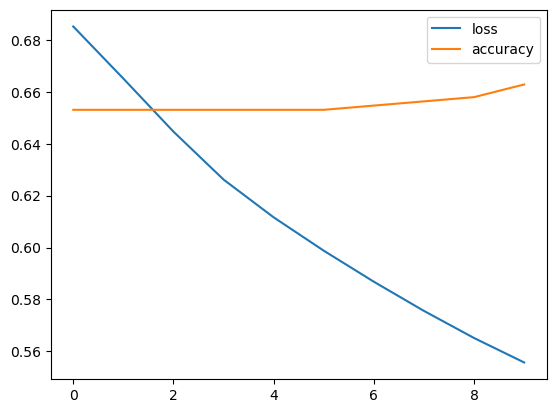

In [53]:
model.fit(X_train, y_train, epochs=10, batch_size=32)  # Train the model

# After training, you can access the history
losses = pd.DataFrame(model.history.history)
losses[['loss', 'accuracy']].plot()  # Plot loss and accuracy

In [ ]:
# !pip install ann_visualizer

In [ ]:
# !pip install graphviz

In [ ]:
# from ann_visualizer.visualize import ann_viz

# ann_viz(model, title="")

In [ ]:
# !pip3 install keras
# !pip3 install ann_visualizer
# !pip install graphviz

In [ ]:
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")

In [ ]:
# python3 index.py